<a href="https://colab.research.google.com/github/mohit1018102/ML_Project/blob/main/California_Housing_Prices/California_Housing_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd;
from google.colab import drive
drive.mount('/content/drive')
housing_df=pd. read_csv("/content/drive/MyDrive/data/housing.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
housing_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


# About this data_set
**Block is an area contains multiple houses.**
1. **longitude**: A measure of how far west a house is; a higher value is farther west.
2. **latitude**: A measure of how far north a house is; a higher value is farther north.
3. **housingMedianAge**: Median age of a house within a block; a lower number is a newer building.
4. **totalRooms**: Total number of rooms within a block.
5. **totalBedrooms**: Total number of bedrooms within a block.
6. **population**: Total number of people residing within a block.
7. **households**: Total number of households, a group of people residing within a home unit, for a block.
8. **medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars).
9. **medianHouseValue**: Median house value for households within a block (measured in US Dollars). **[TARGET]**
10. **oceanProximity**: Location of the house w.r.t ocean/sea.

In [83]:
# shape of dataset (row,columns)
housing_df.shape

(20640, 10)

In [84]:
# information about dataset
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Insights:**
1.  total_bedrooms has null values.
2. Ocean_proximity is a object type, **[required Encoding]**

In [85]:
# Removing NaN row
df=housing_df.copy()
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [86]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [87]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# **Descriptive Analysis**

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

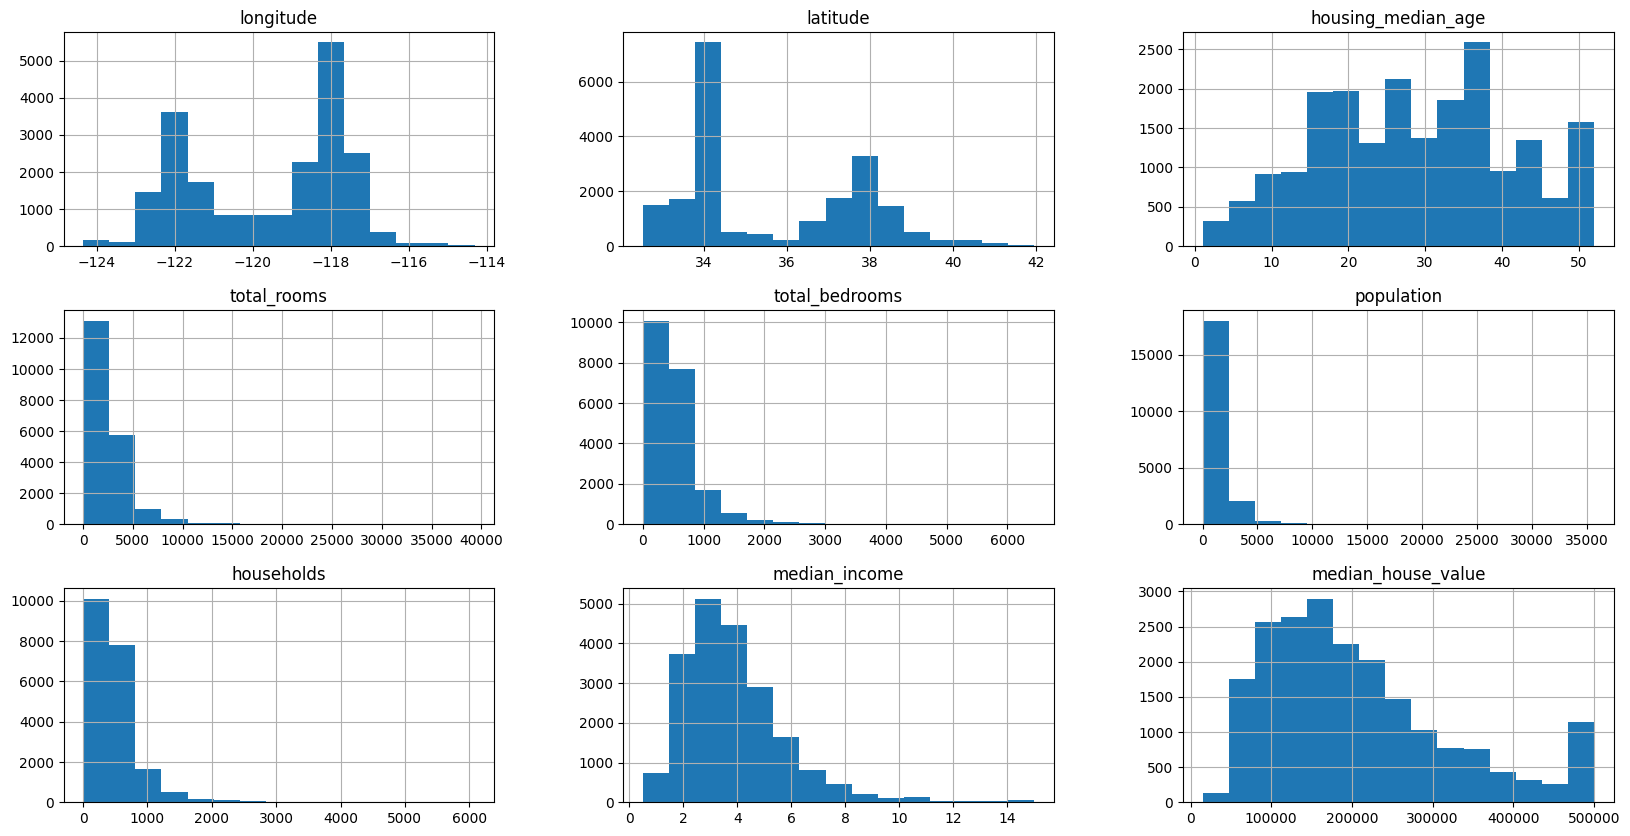

In [88]:
# Describing the data in histogram form to understand the data.
df.hist(figsize=(20,10),bins=15)

In [89]:
# mean mode medium std
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [90]:
# print data
df[['median_income','median_house_value']].head(5)

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0


array([[<Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

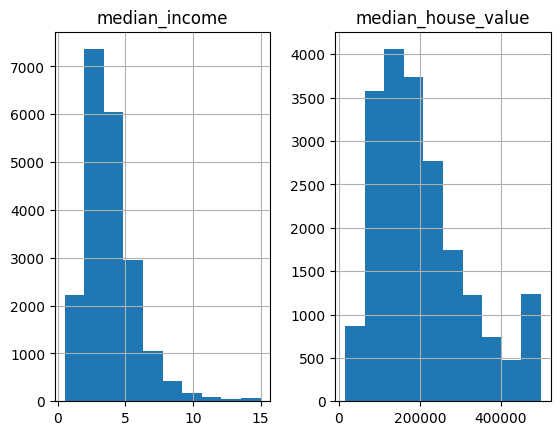

In [91]:
df[['median_income','median_house_value']].hist(bins=10)

# **NOTE**
1. Medium_income and medium_house_value are in different scale.<br>
 8.3252 *10,000  and 452600 <br>
 83252.0 and   452600


In [93]:
# median_income scaled down to $
df['median_house_value']=df['median_house_value']/10000
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,45.26,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,35.85,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,35.21,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,34.13,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,34.22,NEAR BAY


In [94]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['ocean_proximity']=encoder.fit_transform(df['ocean_proximity'])
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,45.26,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,35.85,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,35.21,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,34.13,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,34.22,3


# Iteration 1: Model: Linear Regression

In [95]:
# test train
from sklearn.model_selection import train_test_split

In [97]:
X=df.drop(columns=['median_house_value'], inplace=False)
y=df['median_income']

In [98]:
X.shape

(20433, 9)

In [100]:
X.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3


In [101]:
y.head(2)

0    8.3252
1    8.3014
Name: median_income, dtype: float64

In [102]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=1001)
x_train.shape

(14303, 9)

In [103]:
x_test.shape

(6130, 9)

In [106]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [107]:
y_pred=model.predict(x_test)

In [112]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

6.606366844693242e-29
1.0
